# **Fourier Transform**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [2]:
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams.update({'font.size': 10})

In [3]:
%matplotlib inline

## Define domain

In [4]:
L = np.pi

dx = 0.001
x = L * np.arange(-1 + dx, 1 + dx, dx)

n = len(x)
nquart = int(np.floor(n/4))

## Define hat function

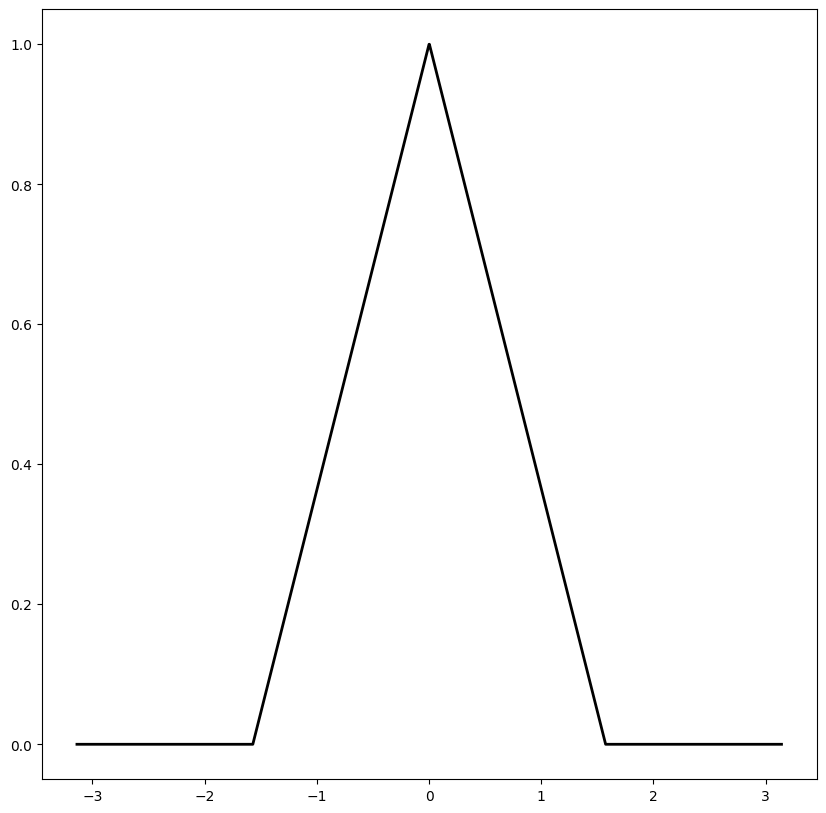

In [5]:
f = np.zeros_like(x)

f[nquart: 2 * nquart] = (4 / n) * np.arange(1, nquart + 1)
f[2 * nquart : 3 * nquart] = np.ones(nquart) - (4 / n) * np.arange(0, nquart)

fig, ax = plt.subplots()
ax.plot(x, f, '-', color = 'k', linewidth = 2)

## Compute Fourier Series 

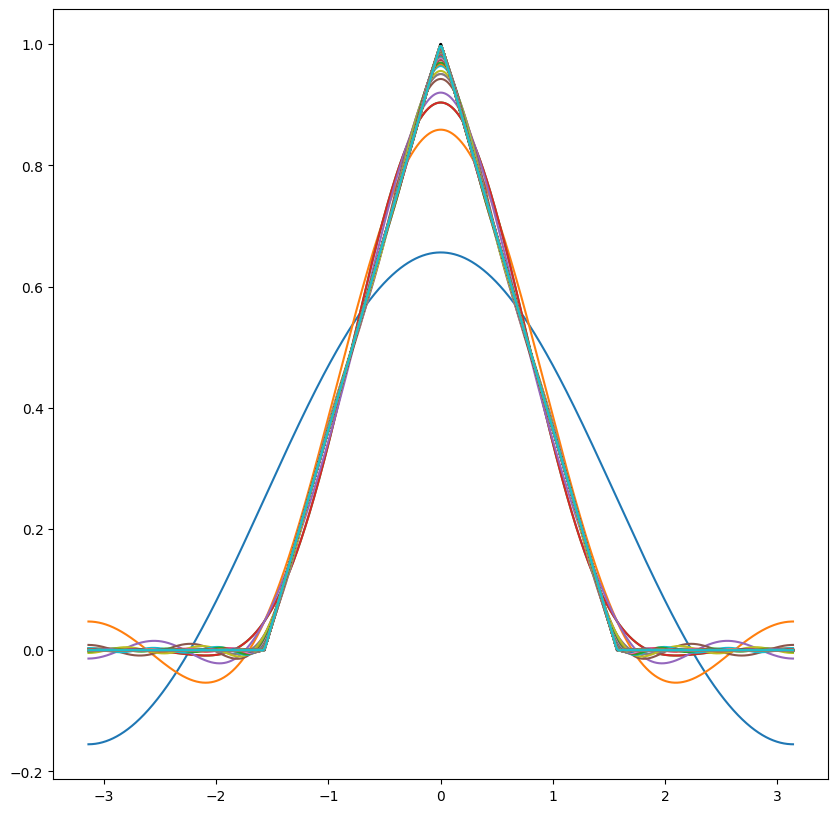

In [6]:
name = 'Accent'
cmap = get_cmap('tab10')
colors = cmap.colors

kmax = 100

A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax)

fig, ax = plt.subplots()
ax.plot(x, f, '-', color = 'k', linewidth = 2)

ax.set_prop_cycle(color = colors)

A0 = np.sum(f * np.ones_like(x)) * dx # integral approximation by sum of rectanglas of width dx and height f(x)

fFS = A0 / 2* np.ones_like(f)
ERR[0] = np.linalg.norm(f - fFS) / np.linalg.norm(f)


for k in range(kmax):
    
    A[k] = np.sum(f * np.cos(np.pi * (k + 1) * x / L)) * dx
    B[k] = np.sum(f * np.sin(np.pi * (k + 1) * x / L)) * dx    
    
    fFS = fFS + A[k] * np.cos((k + 1) * np.pi * x / L) + B[k] * np.sin((k + 1) * np.pi * x / L)
    ERR[k] = np.linalg.norm(f - fFS) / np.linalg.norm(f) 
    
    ax.plot(x, fFS, '-')
    

## Plot amplitudes

In [7]:
thresh = np.median(ERR) * np.sqrt(kmax) * (4 / np.sqrt(3))
r = np.max(np.where( ERR > thresh))

Text(0.5, 1.0, 'Error')

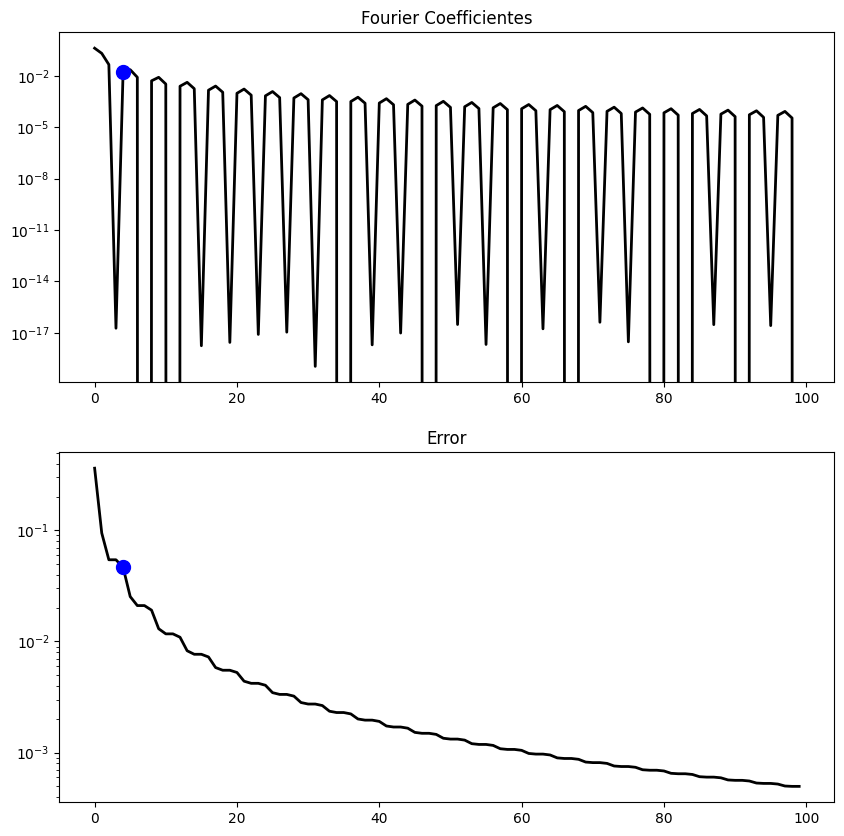

In [8]:
fig, axs = plt.subplots(2, 1)

axs[0].semilogy(np.arange(kmax), A, color = 'k', linewidth = 2)
axs[0].semilogy(r, A[r], 'o', color = 'b', markersize = 10 )

plt.sca(axs[0])
plt.title('Fourier Coefficientes')

axs[1].semilogy(np.arange(kmax), ERR, color = 'k', linewidth = 2)
axs[1].semilogy(r, ERR[r], 'o', color = 'b', markersize = 10)

plt.sca(axs[1])
plt.title('Error')